In [2]:
DATE = '29/01/2024'
NAME = 'NGUYỄN THÀNH PHÁT'

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_1556\3950448772.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.DataFrame({
    "Year": [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979],
    "x": [751.6, 779.2, 810.3, 864.7, 857.5, 874.9, 906.8, 942.9, 988.8, 1015.7],
    "y": [672.1, 696.8, 737.1, 767.9, 762.8, 779.4, 823.1, 864.3, 903.2, 927.6]
})
df

,Year,x,y
0,1970,751.6,672.1
1,1971,779.2,696.8
2,1972,810.3,737.1
3,1973,864.7,767.9
4,1974,857.5,762.8
5,1975,874.9,779.4
6,1976,906.8,823.1
7,1977,942.9,864.3
8,1978,988.8,903.2
9,1979,1015.7,927.6


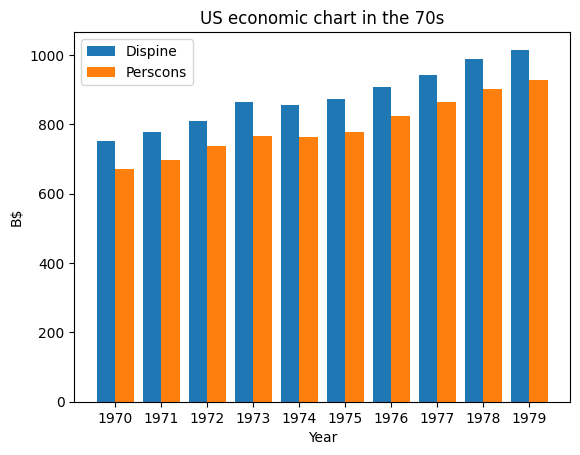

In [14]:
width_bar = 0.4
plt.bar(df['Year']-0.2, df['x'], width_bar)
plt.bar(df['Year']+0.2, df['y'], width_bar)
plt.xticks(df['Year'], df['Year'])
plt.legend(['Dispine', 'Perscons'])
plt.xlabel("Year") 
plt.ylabel("B$") 
plt.title('US economic chart in the 70s')
plt.show()


In [5]:
x = df['x']
y = df['y']

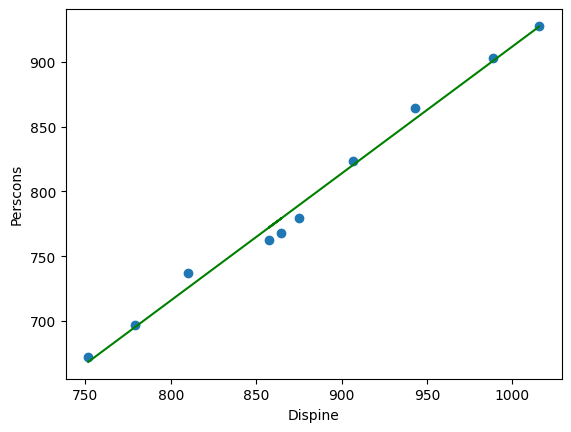

In [15]:
a, b = np.polyfit(x, y, 1)

y_pred = [a*i+b for i in x]
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'green')
plt.xlabel('Dispine')
plt.ylabel('Perscons')
plt.show()

In [16]:
def h(x, w0, w1):
    y = x*w1 + w0
    return y



In [22]:
w0 = 1
w1 = 1
print('model 1')
df['y_pred'] = h(x, w0, w1)
df['err**2'] = (df['y'] - df['y_pred'])**2
display(df)
print(f'MSE model 1: {df["err**2"].mean()}')

model 1


,Year,x,y,y_pred,err**2
0,1970,751.6,672.1,752.6,6480.25
1,1971,779.2,696.8,780.2,6955.56
2,1972,810.3,737.1,811.3,5505.64
3,1973,864.7,767.9,865.7,9564.84
4,1974,857.5,762.8,858.5,9158.49
5,1975,874.9,779.4,875.9,9312.25
6,1976,906.8,823.1,907.8,7174.09
7,1977,942.9,864.3,943.9,6336.16
8,1978,988.8,903.2,989.8,7499.56
9,1979,1015.7,927.6,1016.7,7938.81


MSE model 1: 7592.5650000000005


In [28]:
w0 = -1
w1 = 0.6
print('model 2')
df['y_pred'] = h(x, w0, w1)
df['err**2'] = (df['y'] - df['y_pred'])**2
display(df)
print(f'MSE model 1: {df["err**2"].mean()}')

model 2


,Year,x,y,y_pred,err**2
0,1970,751.6,672.1,449.96,49346.1796
1,1971,779.2,696.8,466.52,53028.8784
2,1972,810.3,737.1,485.18,63463.6864
3,1973,864.7,767.9,517.82,62540.0064
4,1974,857.5,762.8,513.50,62150.4900
5,1975,874.9,779.4,523.94,65259.8116
6,1976,906.8,823.1,543.08,78411.2004
7,1977,942.9,864.3,564.74,89736.1936
8,1978,988.8,903.2,592.28,96671.2464
9,1979,1015.7,927.6,608.42,101875.8724


MSE model 1: 72248.35652


In [34]:
print('model best')
w1 = ((x*y).mean() - x.mean()*y.mean())/((x**2).mean() - (x.mean()**2))
w0 = y.mean() - w1*x.mean()
df['y_pred'] = h(x, w0, w1)
df['err**2'] = (df['y'] - df['y_pred'])**2
display(df)
print(f'MSE model best: {df["err**2"].mean()}')

model best


,Year,x,y,y_pred,err**2
0,1970,751.6,672.1,668.436370,13.422187
1,1971,779.2,696.8,695.464137,1.784530
2,1972,810.3,737.1,725.919338,125.007198
3,1973,864.7,767.9,779.191459,127.497044
4,1974,857.5,762.8,772.140737,87.249369
5,1975,874.9,779.4,789.179982,95.648039
6,1976,906.8,823.1,820.418596,7.189925
7,1977,942.9,864.3,855.770132,72.758641
8,1978,988.8,903.2,900.718484,6.157920
9,1979,1015.7,927.6,927.060765,0.290775


MSE model best: 53.70056284227458


In [37]:
a = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)
c = a + b
d = b + 1
e = c * d
e.backward()

print(a.grad)
print(b.grad)


tensor(2.)
tensor(5.)


![markdown](./image/bt1.png)


x1 = 2, w1 = -1, x2 = 1, w2 = 3  
a = x1 + w1 = 1   
b = x2 + w1 = 0  
c = x2 + w2 = 4  
d = a x b = 0  
e = max(a,b) = 4  
y = e + d = 4  
$ \frac {\partial {a}} {\partial {x1}} = 1 $, $ \frac {\partial {a}} {\partial {w1}} = 1 $  
$ \frac {\partial {b}} {\partial {w1}} = 1 $, $ \frac {\partial {b}} {\partial {x2}} = 1 $  
$ \frac {\partial {c}} {\partial {x2}} = 1 $, $ \frac {\partial {c}} {\partial {w2}} = 1 $  
$ \frac {\partial {d}} {\partial {a}} = 0 $, $ \frac {\partial {d}} {\partial {b}} = 1 $  
$ \frac {\partial {e}} {\partial {b}} = 0 $, $ \frac {\partial {d}} {\partial {c}} = 1 $  
$ \frac {\partial {y}} {\partial {e}} = 1 $, $ \frac {\partial {y}} {\partial {d}} = 1 $  

$ \frac {\partial {y}} {\partial {x1}} = \frac {\partial {x1}} {\partial {x1}} * \frac {\partial {a}} {\partial {x1}} * \frac {\partial {d}} {\partial {a}} * \frac {\partial {y}} {\partial {d}} = 1 * 1 * 0 * 4 = 0$  
$ \frac {\partial {y}} {\partial {w2}} = \frac {\partial {w2}} {\partial {w2}} * \frac {\partial {c}} {\partial {w2}} * \frac {\partial {e}} {\partial {c}} * \frac {\partial {y}} {\partial {e}} = 1 * 1 * 1 * 1 = 1$  
$ \frac {\partial {y}} {\partial {w1}} = \frac {\partial {w1}} {\partial {w1}} * (\frac {\partial {a}} {\partial {w1}} * \frac {\partial {d}} {\partial {a}} + \frac {\partial {b}} {\partial {w1}} *  \frac {\partial {d}} {\partial {b}}) * \frac {\partial {y}} {\partial {d}}  + \frac {\partial {w1}} {\partial {w1}} * \frac {\partial {b}} {\partial {w1}}  * \frac {\partial {e}} {\partial {b}} * \frac {\partial {y}} {\partial {e}}  = 1 * (1*0 + 1*1) * 1 + 1 * 1 * 0 * 1 = 1$  
$ \frac {\partial {y}} {\partial {x2}} = \frac {\partial {x2}} {\partial {x2}} * (\frac {\partial {b}} {\partial {x2}} * \frac {\partial {e}} {\partial {b}} + \frac {\partial {c}} {\partial {x2}} *  \frac {\partial {e}} {\partial {c}}) * \frac {\partial {y}} {\partial {e}}  + \frac {\partial {x2}} {\partial {x2}} * \frac {\partial {b}} {\partial {x2}}  * \frac {\partial {d}} {\partial {b}} * \frac {\partial {y}} {\partial {d}}  = 1 * (1*0 + 1*1) * 1 + 1 * 1 * 1 * 1 = 2$  


In [5]:
x1 = torch.tensor(2.0, requires_grad=True)
w1 = torch.tensor(-1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(3.0, requires_grad=True)
a = x1 + w1
b = x2 + w1
c = x2 + w2
d = a * b
e = torch.max(b,c)
y = e + d
y.backward()

print("dy/dx1: ", x1.grad)
print("dy/dx2: ", x2.grad)
print("dy/dw1: ", w1.grad)
print("dy/dw2: ", w2.grad)



dy/dx1:  tensor(0.)
dy/dx2:  tensor(2.)
dy/dw1:  tensor(1.)
dy/dw2:  tensor(1.)


In [7]:
x = torch.tensor(torch.pi/4, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)
a = x*y
b = torch.sin(x)
z = a + b
z.backward()
print(x.grad)
print(y.grad)


tensor(4.7071)
tensor(0.7854)
